In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [45]:
df = pd.read_csv("G:\My Drive\LTU & Beyond\ML\ThirdProject\Final_Dataset_HousesPrices.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [46]:
df.shape

(2919, 81)

In [47]:
df.shape[1]

81

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [49]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [50]:
pd.set_option('display.max_rows', 500)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

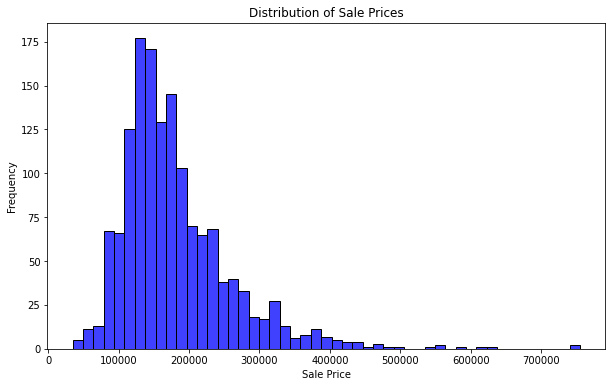

In [51]:
#df_SalePrices = df['SalePrice'][:1460]

plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

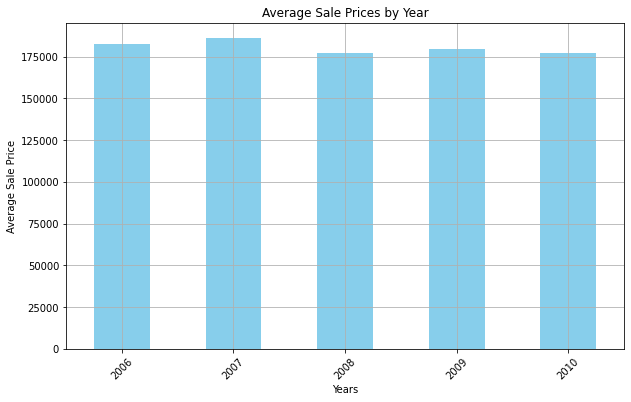

In [52]:
#To make sure that there were no significant inflation in housing market
average_prices = df.groupby('YrSold')['SalePrice'].mean()

plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Sale Prices by Year')
plt.xlabel('Years')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

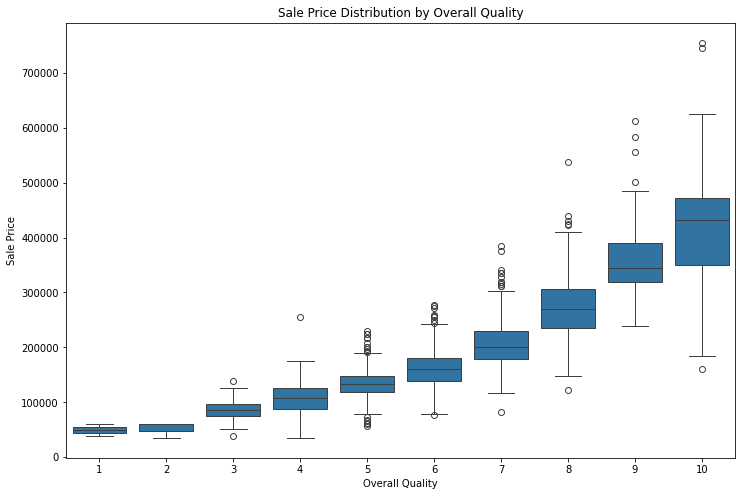

In [53]:
# Boxplot of Sale Prices by Overall Quality
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Sale Price Distribution by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

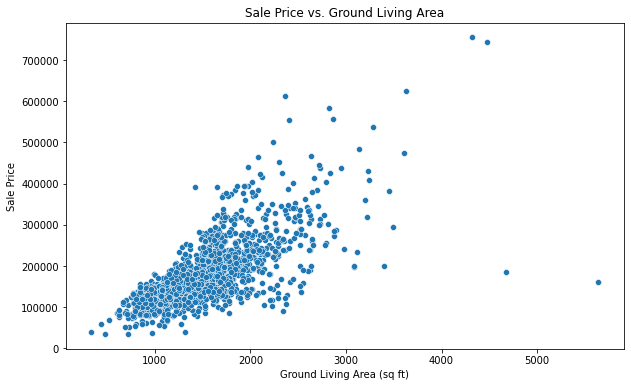

In [54]:
# Scatter plot of Ground Living Area vs Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Sale Price vs. Ground Living Area')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

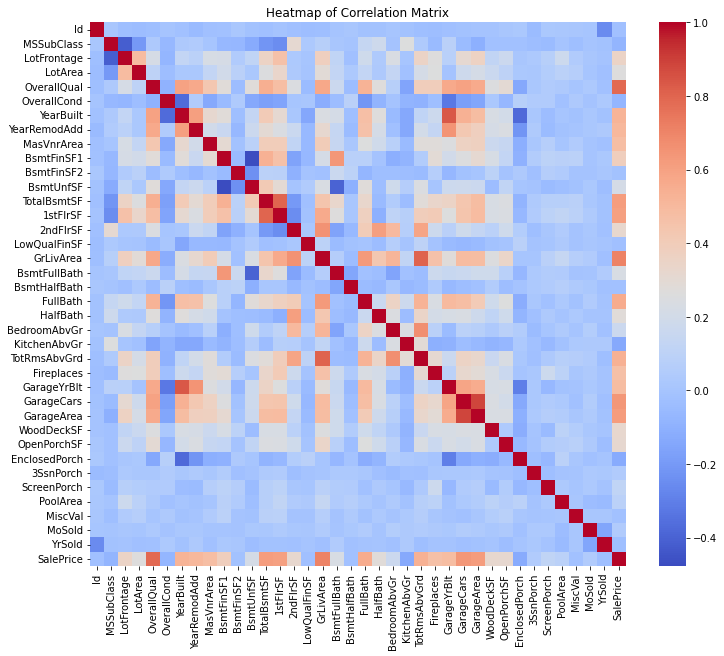

In [55]:
# Select only numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=[np.number])  # This filters to include only numeric columns

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

C:\Users\royas\AppData\Local\Temp/ipykernel_2596/2987765762.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_prices.index, y=neighborhood_prices.values, palette='viridis')


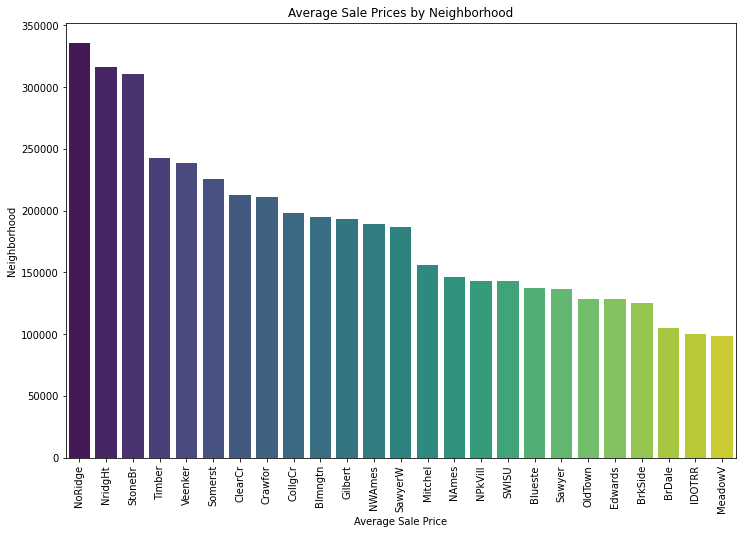

In [56]:
neighborhood_prices = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=neighborhood_prices.index, y=neighborhood_prices.values, palette='viridis')
plt.title('Average Sale Prices by Neighborhood')
plt.xlabel('Average Sale Price')
plt.ylabel('Neighborhood')

plt.xticks(rotation=90)

plt.show()

In [57]:
# To execute correlation matrix we have two option: one is excluding non-numerical columns. 
# But, if we want to include categorical values, we need to change categorical to numerical ones:
df_encoded = pd.get_dummies(df)

# Computing the correlation matrix for the encoded dataset
corr_matrix_encoded = df_encoded.corr()

# Printing the correlation of 'SalePrice' from the encoded data, sorted in descending order
print(corr_matrix_encoded['SalePrice'].sort_values(ascending=False))

SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
BsmtQual_Ex              0.553105
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
GarageYrBlt              0.486362
MasVnrArea               0.477493
Fireplaces               0.466929
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleType_New             0.357509
SaleCondition_Partial    0.352060
LotFrontage              0.351799
FireplaceQu_Gd           0.339329
GarageType_Attchd        0.335961
MasVnrType_Sto

In [58]:
# Missing values that Python finds acyually are not missing, instead they have meaning and we need to replace them with meaningful words.

df['Alley'] = df['Alley'].fillna('NoAccess')
df['MasVnrType'] = df['MasVnrType'].fillna('NoVeneer') # No Masonry Veneer
df['BsmtQual'] = df['BsmtQual'].fillna('NoBase') # No Basement
df['BsmtCond'] = df['BsmtCond'].fillna('NoBase')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NoBase')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NoBase')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NoBase')
df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFire') # No FirePlace
df['GarageType'] = df['GarageType'].fillna('NoGarage') # No Garage
df['GarageFinish'] = df['GarageFinish'].fillna('NoGarage')
df['GarageQual'] = df['GarageQual'].fillna('NoGarage')
df['GarageCond'] = df['GarageCond'].fillna('NoGarage')
df['PoolQC'] = df['PoolQC'].fillna('No') # No Pool
df['Fence'] = df['Fence'].fillna('NoFen') # No Fence
df['MiscFeature'] = df['MiscFeature'].fillna('NoFe') # No Feature

In [59]:
#As I checked, most of the time the values of the columns 'GarageYrBlt' and 'YearBuilt' are the same for the houses built after 1950!
# then we can replace the null values of GarageYrBlt by values of YearBuilt.

# Impute values for houses built after 1950 directly from 'YearBuilt'
df.loc[(df['GarageYrBlt'].isnull()) & (df['YearBuilt'] > 1950), 'GarageYrBlt'] = df['YearBuilt']

# For houses built on or before 1950
# Option A: Calculate median lag if applicable
if df[(df['YearBuilt'] <= 1950) & (df['GarageYrBlt'].notnull())].shape[0] > 0:
    lag = (df.loc[df['YearBuilt'] <= 1950, 'GarageYrBlt'] - df.loc[df['YearBuilt'] <= 1950, 'YearBuilt']).median()
    df.loc[(df['GarageYrBlt'].isnull()) & (df['YearBuilt'] <= 1950), 'GarageYrBlt'] = df['YearBuilt'] + lag
else:
    # Option B: Use the median or mode of 'GarageYrBlt' for older homes
    median_garage_yr = df.loc[df['YearBuilt'] <= 1950, 'GarageYrBlt'].median()
    df.loc[(df['GarageYrBlt'].isnull()) & (df['YearBuilt'] <= 1950), 'GarageYrBlt'] = median_garage_yr

In [60]:
df['MasVnrArea'].fillna(0, inplace=True)

In [61]:
median_lot_frontage = df['LotFrontage'].median()
df['LotFrontage'].fillna(median_lot_frontage, inplace=True)

In [62]:
df = df.drop('Id', axis=1)

In [63]:
# excluding the last column
columns_to_check = df.columns[:-1]  

# Drop rows with any missing values in these columns
df = df.dropna(subset=columns_to_check)

In [64]:
# Handling outliers
# I excluded the last column

numerical_cols = df.iloc[:, :-1].select_dtypes(include=['int64', 'float64']).columns  

# Using IQR to filter out outliers
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_cols] < (Q1 - 3 * IQR)) | (df[numerical_cols] > (Q3 + 3 * IQR))).any(axis=1)]

In [65]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NoAccess,Reg,Lvl,AllPub,Inside,...,0,No,NoFen,NoFe,0,2,2008,WD,Normal,208500.0
2,60,RL,68.0,11250,Pave,NoAccess,IR1,Lvl,AllPub,Inside,...,0,No,NoFen,NoFe,0,9,2008,WD,Normal,223500.0
4,60,RL,84.0,14260,Pave,NoAccess,IR1,Lvl,AllPub,FR2,...,0,No,NoFen,NoFe,0,12,2008,WD,Normal,250000.0
6,20,RL,75.0,10084,Pave,NoAccess,Reg,Lvl,AllPub,Inside,...,0,No,NoFen,NoFe,0,8,2007,WD,Normal,307000.0
10,20,RL,70.0,11200,Pave,NoAccess,Reg,Lvl,AllPub,Inside,...,0,No,NoFen,NoFe,0,2,2008,WD,Normal,129500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.0,1533,Pave,NoAccess,Reg,Lvl,AllPub,Inside,...,0,No,NoFen,NoFe,0,12,2006,WD,Abnorml,NaN
2913,160,RM,21.0,1526,Pave,NoAccess,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,NoFe,0,6,2006,WD,Normal,NaN
2914,160,RM,21.0,1936,Pave,NoAccess,Reg,Lvl,AllPub,Inside,...,0,No,NoFen,NoFe,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,NoAccess,Reg,Lvl,AllPub,Inside,...,0,No,NoFen,NoFe,0,4,2006,WD,Abnorml,NaN


In [66]:
# I manually change the attributes that I am sure are not nominal to numerical values

ExterQual_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterCond_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtQual_order = ['NoBase', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtCond_order = ['NoBase', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtExposure_order = ['NoBase', 'No', 'Mn', 'Av', 'Gd']
BsmtFinType1_order = ['NoBase', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
BsmtFinType2_order = ['NoBase', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
HeatingQC_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
CentralAir_order = ['N', 'Y']
KitchenQual_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
FireplaceQu_order = ['NoFire', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageFinish_order = ['NoGarage', 'Unf', 'RFn', 'Fin']
GarageQual_order = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageCond_order = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
PoolQC_order = ['No', 'Fa', 'TA', 'Gd', 'Ex']

# Create the OrdinalEncoder and tell it the order for each feature
encoder = OrdinalEncoder(categories=[ExterQual_order, ExterCond_order, BsmtQual_order, BsmtCond_order, BsmtExposure_order, 
                                    BsmtFinType1_order, BsmtFinType2_order, HeatingQC_order, CentralAir_order, KitchenQual_order,
                                    FireplaceQu_order, GarageFinish_order, GarageQual_order, GarageCond_order, PoolQC_order])

# Select columns to encode
columns_to_encode = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                    'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                    'PoolQC']

# Transform the data
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

In [67]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

# Iterate through each categorical column and encode it
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [68]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,0.0,4,0,0,2,2008,8,4,208500.0
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,0.0,4,0,0,9,2008,8,4,223500.0
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,0.0,4,0,0,12,2008,8,4,250000.0
6,20,3,75.0,10084,1,1,3,3,0,4,...,0,0.0,4,0,0,8,2007,8,4,307000.0
10,20,3,70.0,11200,1,1,3,3,0,4,...,0,0.0,4,0,0,2,2008,8,4,129500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,4,21.0,1533,1,1,3,3,0,4,...,0,0.0,4,0,0,12,2006,8,0,NaN
2913,160,4,21.0,1526,1,1,3,3,0,4,...,0,0.0,0,0,0,6,2006,8,4,NaN
2914,160,4,21.0,1936,1,1,3,3,0,4,...,0,0.0,4,0,0,6,2006,8,4,NaN
2915,160,4,21.0,1894,1,1,3,3,0,4,...,0,0.0,4,0,0,4,2006,8,0,NaN


In [69]:
# Feature Scaling

df_x = df.columns[:-1]

scaler = StandardScaler()

# Apply scaling to all columns except the last column
df[df_x] = scaler.fit_transform(df[df_x])

In [70]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.041276,0.061909,-0.118251,-0.201611,0.035333,-0.055611,0.785021,0.260573,0.0,0.563588,...,0.0,0.0,0.389091,-0.035333,0.0,-1.550885,0.177655,0.350257,0.105523,208500.0
2,0.041276,0.061909,0.038332,0.579670,0.035333,-0.055611,-1.305472,0.260573,0.0,0.563588,...,0.0,0.0,0.389091,-0.035333,0.0,1.054732,0.177655,0.350257,0.105523,223500.0
4,0.041276,0.061909,0.873441,1.419547,0.035333,-0.055611,-1.305472,0.260573,0.0,-0.724155,...,0.0,0.0,0.389091,-0.035333,0.0,2.171425,0.177655,0.350257,0.105523,250000.0
6,-0.867211,0.061909,0.403692,0.254322,0.035333,-0.055611,0.785021,0.260573,0.0,0.563588,...,0.0,0.0,0.389091,-0.035333,0.0,0.682501,-0.586309,0.350257,0.105523,307000.0
10,-0.867211,0.061909,0.142721,0.565719,0.035333,-0.055611,0.785021,0.260573,0.0,0.563588,...,0.0,0.0,0.389091,-0.035333,0.0,-1.550885,0.177655,0.350257,0.105523,129500.0


In [71]:
# Data partitioning

known_data = df.dropna(subset=['SalePrice'])

# Features and target variable
X = known_data.drop('SalePrice', axis=1)
y = known_data['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
# MODEL: Random Forest

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
house_preds = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, house_preds)
mse = mean_squared_error(y_test, house_preds)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 18644.352156862748
Root Mean Squared Error (RMSE): 28039.28347276698


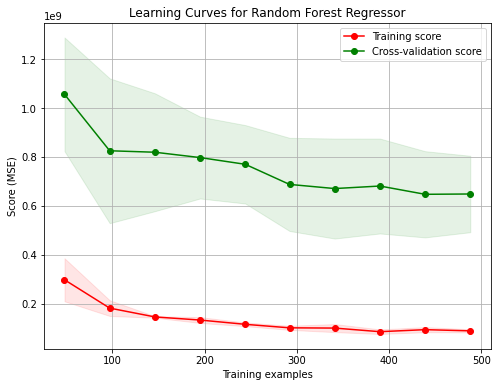

In [73]:
# Plotting learning curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = forest_model, X = X_train, y = y_train,                                                     
    train_sizes = np.linspace(0.1, 1.0, 10), cv = 5,                       
    scoring = 'neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
validation_scores_std = validation_scores.std(axis = 1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

plt.title("Learning Curves for Random Forest Regressor")
plt.xlabel("Training examples")
plt.ylabel("Score (MSE)")
plt.legend(loc="best")
plt.grid()
plt.show()

In [74]:
# Hyperparameter Tuning

# Creating a parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Setup the RandomizedSearchCV
random_search = RandomizedSearchCV(forest_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, 
                                   n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predictions
best_preds = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, best_preds)
rmse = sqrt(mean_squared_error(y_test, best_preds))
print(f"Optimized Mean Absolute Error (MAE): {mae}")
print(f"Optimized Root Mean Squared Error (RMSE): {rmse}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Optimized Mean Absolute Error (MAE): 18347.635466790973
Optimized Root Mean Squared Error (RMSE): 28319.688273063715


In [75]:
# Regularization

# Set up a parameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [100, 200, 300]
}

# Configure the GridSearchCV
grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Perform the search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 608762031.7711722


In [76]:
# Predict using the best model found by GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 17968.774019607845
Root Mean Squared Error (RMSE): 27739.56404121329


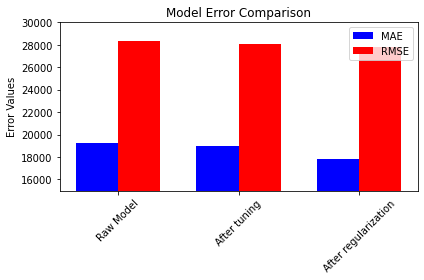

In [77]:
# Model performance before tuning, after tuning, and after regularization

errors = {
    'Raw Model': {'MAE': 19234.74, 'RMSE': 28353.93},
    'After tuning': {'MAE': 18960.73, 'RMSE': 28100.58},
    'After regularization': {'MAE': 17799.32, 'RMSE': 27776.0}
}

fig, ax = plt.subplots()
models = list(errors.keys())
num_models = len(models)

bar_width = 0.35
index = np.arange(num_models)

# Extract MAE and RMSE values for each model
mae_values = [errors[model]['MAE'] for model in models]
rmse_values = [errors[model]['RMSE'] for model in models]

# Plot the bar chart
bar1 = ax.bar(index, mae_values, bar_width, color='b', label='MAE')
bar2 = ax.bar(index + bar_width, rmse_values, bar_width, color='r', label='RMSE')

ax.set_ylabel('Error Values')
ax.set_title('Model Error Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()


# Set y-axis limits
ax.set_ylim(15000, 30000)

plt.show()

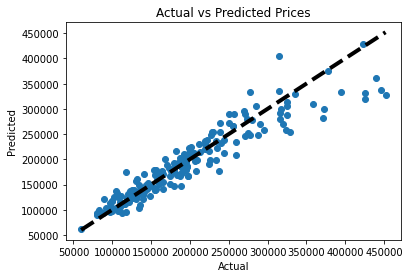

In [78]:
plt.scatter(y_test, house_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()

In [79]:
# Identify the subset of the DataFrame where SalePrice is NaN
unknown_data = df[df['SalePrice'].isnull()]

# Prepare the features from the unknown data for prediction
X_unknown = unknown_data.drop('SalePrice', axis=1)

# Use the trained model to predict SalePrices for the unknown data
predicted_prices = forest_model.predict(X_unknown)

# Add the predicted prices back to the unknown_data DataFrame
unknown_data['SalePrice'] = predicted_prices

# Combine the data with known prices and data with predicted prices
full_data = pd.concat([known_data, unknown_data])

# Check for any remaining missing values in SalePrice
print(full_data['SalePrice'].isnull().sum())  # Should output 0

# Optionally, inspect the first few rows of the DataFrame to confirm changes
print(full_data.head())

0
    MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  LotShape  \
0     0.041276  0.061909    -0.118251 -0.201611  0.035333 -0.055611  0.785021   
2     0.041276  0.061909     0.038332  0.579670  0.035333 -0.055611 -1.305472   
4     0.041276  0.061909     0.873441  1.419547  0.035333 -0.055611 -1.305472   
6    -0.867211  0.061909     0.403692  0.254322  0.035333 -0.055611  0.785021   
10   -0.867211  0.061909     0.142721  0.565719  0.035333 -0.055611  0.785021   

    LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC     Fence  \
0      0.260573        0.0   0.563588  ...       0.0     0.0  0.389091   
2      0.260573        0.0   0.563588  ...       0.0     0.0  0.389091   
4      0.260573        0.0  -0.724155  ...       0.0     0.0  0.389091   
6      0.260573        0.0   0.563588  ...       0.0     0.0  0.389091   
10     0.260573        0.0   0.563588  ...       0.0     0.0  0.389091   

    MiscFeature  MiscVal    MoSold    YrSold  SaleType  SaleCondit

C:\Users\royas\AppData\Local\Temp/ipykernel_2596/1386810217.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_data['SalePrice'] = predicted_prices


In [80]:
# Save the DataFrame to a new CSV file, if needed
full_data.to_csv('updated_house_prices.csv', index=False)